In [1]:
import pandas as pd
import numpy as np
import multiprocessing
from bs4 import BeautifulSoup as bs
from selectolax.parser import HTMLParser

from sklearn.model_selection import train_test_split

#preprocessing
import re
import pymorphy2
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
import matplotlib.pyplot as plt
import string

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.preprocessing.text import Tokenizer
from time import time  # To time our operations
from collections import defaultdict, Counter  # For word frequency

import collections
import pathlib

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import os
import re
import shutil
import string


print(tf.__version__)

import logging  # Setting up the loggings to monitor gensim
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

import warnings
warnings.filterwarnings('ignore')

2.12.0


In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/adwiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/adwiz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# from subprocess import check_output
# print(check_output(["ls", "../datasets/"]).decode("utf8"))

In [4]:
def read_train_data():
    data = pd.read_json('../datasets/dataset.json')
    mapping = {False: 0, True: 1}
    data.replace({'hasBadWords': mapping}, inplace=True)
    data.rename(columns={"hasBadWords": "labels"}, inplace=True)
    data.rename(columns={"text": "raw_text"}, inplace=True)
    data.drop(['violation'], axis=1, inplace=True)
    print('Data size %d' % len(data))
    print('Data headers %s' % data.columns.values)
    return data

# Preprocessing function

In [5]:
data = read_train_data()

Data size 86439
Data headers ['raw_text' 'labels']


In [6]:
# function to clean and pre-process the text.
def clean_text(text):  
    
    # 1. Removing html tags
    text = bs(text,"lxml").get_text()
    
    # 2. Retaining only alphabets.
    text = re.sub("[^a-zA-Z]"," ", text)
    
    # 3. Converting to lower case and splitting
    word_tokens = text.lower().split()
    
    # 4. Remove stopwords
    le = WordNetLemmatizer()
    stop_words = set(stopwords.words("english")+ ['14000kbps', 'november', '1080p', 'email', 
                                                 '4k', 'mp4', 'error', '404', '2022'])     
    word_tokens = [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned_review = " ".join(word_tokens)
    return cleaned_review

In [7]:
data['text'] = data.apply(lambda row: clean_text(row.raw_text), axis=1)

In [8]:
data.head()

,raw_text,labels,text
0,My Favorite Slut,0,favorite slut
1,girlfriends sit on each other's faces with the...,0,girlfriend sit face ass
2,bound beauty kisses her girlfriend,0,bound beauty kiss girlfriend
3,MORGAN - Anytime - Nail Painting On The Slave'...,0,morgan anytime nail painting slave face
4,TRANSGENDER COACHING (wmv) PART 1,0,transgender coaching wmv part


In [9]:
data = data[['text', 'labels']]#, 'raw_text']] # columns reorder

In [10]:
data.head()

,text,labels
0,favorite slut,0
1,girlfriend sit face ass,0
2,bound beauty kiss girlfriend,0
3,morgan anytime nail painting slave face,0
4,transgender coaching wmv part,0


# Train the Word2Vec model


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['labels'], test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69151,), (17288,), (69151,), (17288,))

In [13]:
X_train

47306                                fetish femdom central
26744    petite blonde smelly stocking k obsession secr...
78454                                      skyhighskittles
30196    sexy stefania love teasing cock soft hand foot...
20091                              succulent teen sol k mp
                               ...                        
6265     double treat pregnant belly wrinkled sol right...
54886                               fetish sex naughty fun
76820                              passionxcouple onlyfans
860                                gf caught wearing panty
15795                       stink one night stand bathroom
Name: text, Length: 69151, dtype: object

# Tokenize the text data

In [14]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
vocab_size

48002

In [15]:
# tokenizer.word_index

# Pad the sequences to a fixed length

# Train the Word2Vec model

In [16]:
sentences = [sentence for sentence in X_train]
w2v_model = Word2Vec(sentences, window=5, min_count=1, workers=-1)

In [17]:
# Pad the sequences to a fixed length
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Create a weight matrix for the embedding layer

In [18]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Define the CNN model

Metal device set to: Apple M2


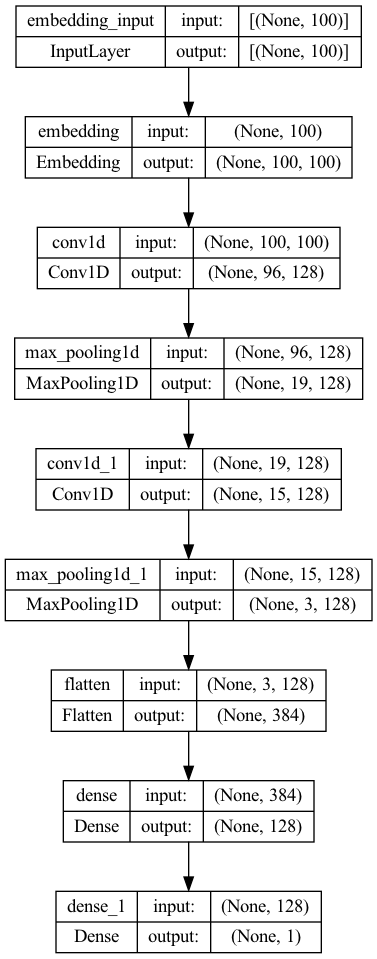

In [19]:
# Define the CNN model

model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

loss = keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = keras.optimizers.legacy.Adam(learning_rate=.001)
metrics = [tf.keras.metrics.BinaryAccuracy(),
           tf.keras.metrics.FalseNegatives(),
           tf.keras.metrics.FalsePositives(),
          ]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# draw model
tf.keras.utils.plot_model(model, show_shapes=True)

In [20]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


2023-04-30 10:59:54.472835: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2161/2161 [==============================] - 23s 10ms/step - loss: 0.3994 - binary_accuracy: 0.9618 - false_negatives: 2640.0000 - false_positives: 0.0000e+00 - val_loss: 0.2387 - val_binary_accuracy: 0.9630 - val_false_negatives: 640.0000 - val_false_positives: 0.0000e+00
Epoch 2/5
2161/2161 [==============================] - 22s 10ms/step - loss: 0.1958 - binary_accuracy: 0.9618 - false_negatives: 2640.0000 - false_positives: 0.0000e+00 - val_loss: 0.1683 - val_binary_accuracy: 0.9630 - val_false_negatives: 640.0000 - val_false_positives: 0.0000e+00
Epoch 3/5
2161/2161 [==============================] - 22s 10ms/step - loss: 0.1652 - binary_accuracy: 0.9618 - false_negatives: 2640.0000 - false_positives: 0.0000e+00 - val_loss: 0.1589 - val_binary_accuracy: 0.9630 - val_false_negatives: 640.0000 - val_false_positives: 0.0000e+00
Epoch 4/5
2161/2161 [==============================] - 22s 10ms/step - loss: 0.1622 - binary_accuracy: 0.9618 - false_negatives: 2640.0000 - false_positives: 

In [21]:
history_df = pd.DataFrame(model.history.history)
history_df.head(15)

,loss,binary_accuracy,false_negatives,false_positives,val_loss,val_binary_accuracy,val_false_negatives,val_false_positives
0,0.399406,0.961823,2640.0,0.0,0.238682,0.96298,640.0,0.0
1,0.195776,0.961823,2640.0,0.0,0.168329,0.96298,640.0,0.0
2,0.165247,0.961823,2640.0,0.0,0.158944,0.96298,640.0,0.0
3,0.162228,0.961823,2640.0,0.0,0.158419,0.96298,640.0,0.0
4,0.162121,0.961823,2640.0,0.0,0.158402,0.96298,640.0,0.0


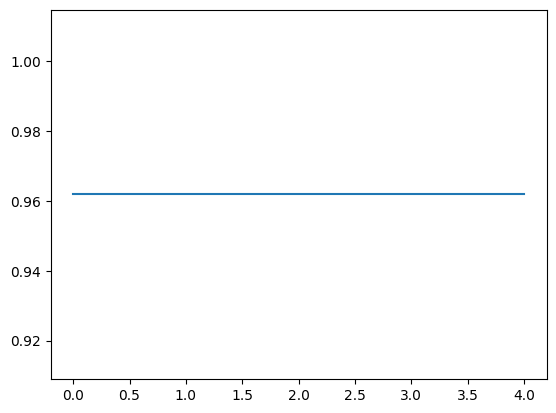

In [22]:
import matplotlib.pyplot as plt
plt.plot(history_df.loss);

In [23]:
def read_validation_data():
    data_val = pd.read_json('../datasets/neil_ProducerClipSite_rand.json')
    data_val.rename(columns={"hasBadWords": "labels"}, inplace=True)
    data_val.rename(columns={"Top": "raw_text"}, inplace=True)
    data_val.drop(['SiteID', 'Title', 'Description', 'Keywords', 'Bottom'], axis=1, inplace=True)
    print('Data size %d' % len(data_val))
    print('Data headers %s' % data_val.columns.values)
    return data_val

In [24]:
data_val = read_validation_data()

Data size 10000
Data headers ['raw_text']


In [25]:
data_val['text'] = data_val.apply(lambda row: clean_text(row.raw_text), axis=1)
# data_val

In [26]:
data_val = data_val[['text']]

In [27]:
X_val = data_val.text.to_numpy()
X_val.shape

(10000,)

In [28]:
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding="post", truncating="post")

In [29]:
predictions = model.predict(X_val_padded)
predictions = [1 if p > .5 else 0 for p in predictions]

313/313 [==============================] - 1s 3ms/step


In [30]:
print(X_val[454])
print(X_val_sequences[454])
print(X_val_padded[454])
print(predictions[454])

subscribe get newsletter new updateshi name katsumi welcome store feedback custom clip request price start send e mail katsumip gmail com answer every e mail donation go towards purchase second better camera better quality p multiple camera angle cumshot hope enjoy video
[7030, 19, 10363, 86, 756, 28858, 356, 9, 2805, 175, 3, 389, 945, 106, 762, 138, 755, 1007, 82, 2239, 217, 138, 755, 11183, 111, 1920, 1528, 602, 436, 253, 436, 402, 183, 450, 253, 888, 312, 575, 162, 4]
[ 7030    19 10363    86   756 28858   356     9  2805   175     3   389
   945   106   762   138   755  1007    82  2239   217   138   755 11183
   111  1920  1528   602   436   253   436   402   183   450   253   888
   312   575   162     4     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0 

In [31]:
data_val['predictions'] = predictions
data_val = data_val[['text', 'predictions']] # columns reorder

In [32]:
data_val.to_csv('../datasets/DATA_VAL.csv')